# 鸢尾花数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.neighbors import KNeighborsClassifier                      #knn算法
from sklearn.tree import DecisionTreeClassifier                         #决策树
from sklearn.naive_bayes import GaussianNB                              #高斯贝叶斯
from sklearn.linear_model import LogisticRegression                     #逻辑回归
from sklearn.ensemble import RandomForestClassifier                     #随机森林
from sklearn.svm import SVC                                             #支持向量机

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


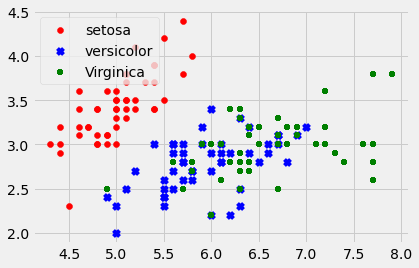

In [7]:
#载入数据集  
iris = load_iris()  
#获取花卉两列数据集  
DD = iris.data  
X1 = [x[0] for x in DD]  
Y1 = [x[1] for x in DD]  
  
#plt.scatter(X, Y, c=iris.target, marker='x')
plt.scatter(X1[:50], Y1[:50], color='red', marker='o', label='setosa') #前50个样本
plt.scatter(X1[50:100], Y1[50:100], color='blue', marker='x', label='versicolor') #中间50个
plt.scatter(X1[100:], Y1[100:],color='green', marker='+', label='Virginica') #后50个样本
plt.legend(loc=2) #左上角
plt.show()

In [8]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=101)
print(Xtrain.shape)
print(Ytrain.shape)

(105, 4)
(105,)


## 决策树

In [29]:
#网格搜索
from sklearn.model_selection import GridSearchCV

# 设置可选参数
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,10)}
# 设置网格
GR = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

# 输出接口  最优的取值
print(GR.best_params_)
print(GR.best_score_)   #网格搜索后的模型的评判标准

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9714285714285715


In [9]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,
                            min_samples_leaf=1,min_samples_split=2).fit(Xtrain,Ytrain)
decision_tree.fit(Xtrain, Ytrain)
Y_pred = decision_tree.predict(Xtest)
acc_decision_tree = round(decision_tree.score(Xtest, Ytest) * 100, 2)
cross_decision_tree = cross_val_score(decision_tree,X,y,cv=10).mean()
print(acc_decision_tree)
print(cross_decision_tree)

97.78
0.96


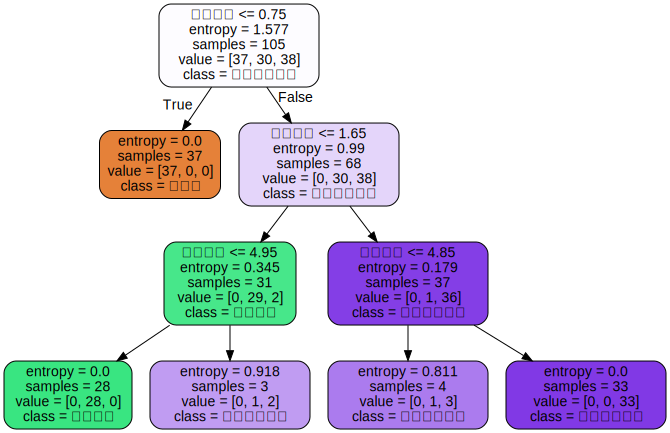

In [38]:
from sklearn import tree
feature_name = ['花萼长度','花萼宽度','花瓣长度','花瓣宽度']     

import graphviz #可视化组件，需自己安装，配置环境变量等
dot_data = tree.export_graphviz(decision_tree
                                ,feature_names = feature_name
                                ,class_names = ["山鸢尾","变色鸢尾","维吉尼亚鸢尾"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

## 随机森林

0.9427272727272727 21


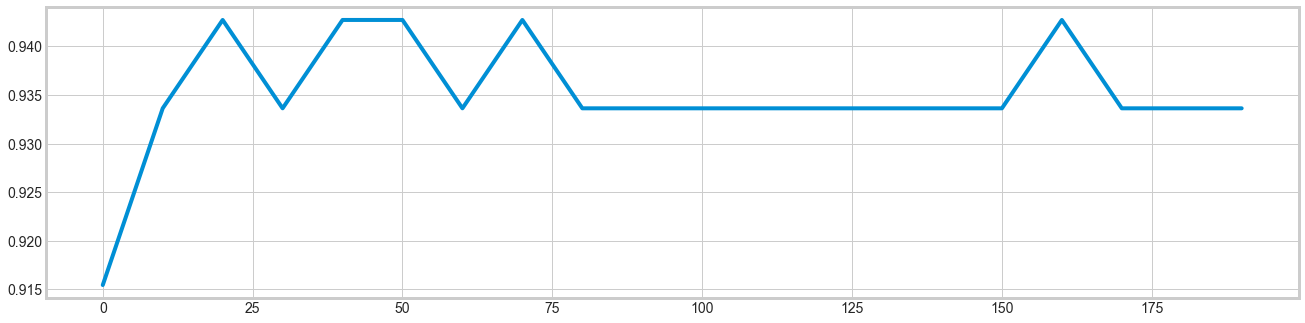

In [39]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

In [54]:
#调整max_depth
param_grid = {'max_depth':np.arange(1,20,1)}

rfc = RandomForestClassifier(n_estimators=25
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 4}
0.96


In [10]:
random_forest = RandomForestClassifier(n_estimators=25
                                       ,random_state=90
                                       ,max_depth=4)
random_forest.fit(Xtrain, Ytrain)
Y_pred = random_forest.predict(Xtest)
print(random_forest.score(Xtrain, Ytrain))
print(random_forest.score(Xtest, Ytest))
acc_random_forest = round(random_forest.score(Xtest, Ytest) * 100, 2)
cross_random_forest = cross_val_score(random_forest,X,y,cv=10).mean()
print(acc_random_forest)
print(cross_random_forest)

0.9809523809523809
0.9777777777777777
97.78
0.96


## KNN

In [11]:
from sklearn.preprocessing import MinMaxScaler
#实现归一化
scaler = MinMaxScaler()                             #实例化
scaler = scaler.fit(X)                           #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(X)                     #通过接口导出结果
result

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(result,y,test_size=0.3)
print(Xtrain2.shape)
print(Ytrain2.shape)

(105, 4)
(105,)


In [14]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain2, Ytrain2)
Y_pred = knn.predict(Xtest2)
print(knn.score(Xtrain2, Ytrain2))
print(knn.score(Xtest2, Ytest2))
acc_knn = round(knn.score(Xtest2, Ytest2) * 100, 2)
cross_knn = cross_val_score(knn,result,y,cv=10).mean()
print(acc_knn)
print(cross_knn)

0.9809523809523809
0.9777777777777777
97.78
0.96


## 朴素贝叶斯

In [15]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, Ytrain)
Y_pred = gaussian.predict(Xtest)
print(gaussian.score(Xtrain, Ytrain))
print(gaussian.score(Xtest, Ytest))
acc_gaussian = round(gaussian.score(Xtest, Ytest) * 100, 2)
cross_gaussian = cross_val_score(gaussian,X,y,cv=10).mean()
print(acc_gaussian)
print(cross_gaussian)

0.9523809523809523
0.9555555555555556
95.56
0.9533333333333334


## 逻辑回归

In [16]:
logreg = LogisticRegression(penalty="l2",solver="newton-cg",C=0.5,max_iter=1000) #penalty="l2",solver="liblinear",C=0.5,max_iter=1000
logreg.fit(Xtrain, Ytrain) #'liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'
Y_pred = logreg.predict(Xtest)
print(logreg.score(Xtrain, Ytrain))
print(logreg.score(Xtest, Ytest))
acc_log = round(logreg.score(Xtest, Ytest) * 100, 2)
cross_log = cross_val_score(logreg,X,y,cv=10).mean()
print(acc_log)
print(cross_log)

0.9619047619047619
0.9777777777777777
97.78
0.9666666666666666


## SVM

In [75]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest) #获取模型的预测结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    print(score)
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

1.0
00:00:001995
1.0
00:00:004018
0.9777777777777777
00:00:005985
0.26666666666666666
00:00:010972


In [17]:
clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 2000 #设定越大，代表允许我们的算法使用越多的内存来进行计算
             ,decision_function_shape='ovr'
             ,C=0.8
             ).fit(Xtrain, Ytrain)
score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
acc_svm = round(score * 100, 2)
cross_svm = cross_val_score(clf,X,y,cv=10).mean()
print(acc_svm)
print(cross_svm)

100.0
0.9866666666666667


In [77]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [79]:
x = X[:, :2]
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [80]:
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围

In [81]:
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点

In [82]:
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

In [83]:
grid_hat = clf.predict(grid_test)       # 预测分类值

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

In [78]:
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

## 评价

In [18]:
models = pd.DataFrame({
    'Model': [ 'KNN','Logistic Regression','GaussianNB',
              'Random Forest','Decision Tree','SVM'],
    'Score': [acc_knn,acc_log,acc_gaussian,
              acc_random_forest,acc_decision_tree,acc_svm]})

models.sort_values(by='Score', ascending=False)

,Model,Score
5,SVM,100.00
0,KNN,97.78
1,Logistic Regression,97.78
3,Random Forest,97.78
4,Decision Tree,97.78
2,GaussianNB,95.56
